# Author : Vidhan Prajapati
# Topic : Employee Attrition Prediction (IBM Fictional Dataset)


##Libraries

In [35]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC , SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [36]:
data = pd.read_csv('/content/train.csv')

In [37]:
data


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,57,0,Travel_Rarely,405,Research & Development,1,2,Life Sciences,1,1483,2,Male,93,4,2,Research Scientist,3,Married,4900,2721,0,Y,No,24,4,1,80,1,13,2,2,12,9,2,8
1054,49,0,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,1,1484,3,Male,35,3,3,Healthcare Representative,2,Divorced,10466,20948,3,Y,No,14,3,2,80,2,29,3,3,8,7,0,7
1055,34,0,Travel_Frequently,829,Research & Development,15,3,Medical,1,1485,2,Male,71,3,4,Research Director,1,Divorced,17007,11929,7,Y,No,14,3,4,80,2,16,3,2,14,8,6,9
1056,28,1,Travel_Frequently,1496,Sales,1,3,Technical Degree,1,1486,1,Male,92,3,1,Sales Representative,3,Married,2909,15747,3,Y,No,15,3,4,80,1,5,3,4,3,2,1,2


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [39]:
data.isna().sum().sum() # To check missing values

0

# Preprocessing

In [40]:
def onehot_encode(df,column):
  df = df.copy()
  dummies = pd.get_dummies(df[column],prefix=column)
  df = pd.concat([df,dummies],axis=1)
  df = df.drop(column,axis=1)
  return df

In [41]:
def preprocess_inputs(df):
  df = df.copy()

  # Drop single-valued and id columns
  df=df.drop(['EmployeeCount', 'EmployeeNumber','Over18','StandardHours'],axis=1)

  # Binary-encode Binary Columns
  df["Gender"]=df['Gender'].replace({'Female':0 , 'Male':1})
  df["OverTime"]=df['OverTime'].replace({'No':0 , 'Yes':1})

  # Ordinal-encode the BusinessTravel Column
  df['BusinessTravel']=df['BusinessTravel'].replace({'Non-Travel':0 ,'Travel_Rarely':1,'Travel_Frequently':2 })

  # One-Hot Encoding
  for column in ['Department','EducationField','JobRole','MaritalStatus']:
    df =  onehot_encode(df,column=column)

  # For now Every main value of column is numeric

  # Split df into X and Y
  y=df['Attrition']
  X=df.drop('Attrition',axis=1)

  # Train-Test Split
  X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.7 , shuffle=True,random_state=1)

  # Scale X
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index , columns = X_train.columns)
  X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index , columns = X_test.columns)

  return  X_train , X_test , y_train , y_test

In [42]:
X_train , X_test , y_train , y_test = preprocess_inputs(data)

In [43]:
X_train

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
69,-0.151184,-0.178690,-1.225782,-0.001490,0.049628,1.171467,0.877687,0.668363,-1.036543,-0.989936,0.239205,-0.691656,1.092955,-1.097594,1.583385,0.544472,-0.413384,-1.606612,0.297044,-1.206608,-2.230260,-1.080579,-0.973355,-1.195867,-0.693579,-1.169939,-0.201959,0.733799,-0.671551,-0.128388,-0.818797,-0.372104,1.498537,-0.248381,-0.32323,-0.291623,-0.179104,-0.463796,-0.288886,-0.338316,-0.242188,2.008485,-0.539860,-0.239046,-0.541947,1.111598,-0.694958
491,0.589717,1.710319,0.449329,-0.001490,2.034728,1.171467,0.877687,0.320760,0.399865,-0.092200,0.239205,-0.214707,0.789471,0.071067,1.583385,-0.563944,-0.413384,-0.684989,0.297044,-0.219444,0.140993,0.337202,0.129923,0.703732,0.493122,0.770594,-0.201959,0.733799,-0.671551,-0.128388,-0.818797,-0.372104,1.498537,-0.248381,-0.32323,-0.291623,-0.179104,2.156120,-0.288886,-0.338316,-0.242188,-0.497888,-0.539860,-0.239046,1.845200,-0.899606,-0.694958
1024,1.013090,-0.178690,-1.125226,-0.858797,1.042178,-1.574739,-1.139358,0.817335,0.399865,1.703272,0.239205,2.177326,1.788286,0.071067,-0.631558,1.098680,-0.413384,-0.684989,1.518226,1.754884,-0.649424,1.754983,2.021255,3.417444,0.789798,0.493375,-0.201959,0.733799,-0.671551,-0.128388,-0.818797,-0.372104,1.498537,-0.248381,-0.32323,-0.291623,-0.179104,-0.463796,-0.288886,-0.338316,4.129017,-0.497888,-0.539860,-0.239046,-0.541947,1.111598,-0.694958
781,-1.209614,-0.178690,-1.534806,-0.981270,-0.942923,-1.574739,0.877687,-0.324787,-1.036543,-0.989936,-1.557871,-0.573616,-0.408374,-0.708040,-0.631558,0.267368,-0.413384,-1.606612,1.518226,-0.713026,-0.649424,0.337202,-0.342911,-0.381753,-0.396903,-0.338282,-0.201959,0.733799,-0.671551,-0.128388,-0.818797,-0.372104,1.498537,-0.248381,-0.32323,-0.291623,-0.179104,2.156120,-0.288886,-0.338316,-0.242188,-0.497888,-0.539860,-0.239046,-0.541947,1.111598,-0.694958
757,-0.362870,-0.178690,-1.475944,-0.981270,1.042178,-0.659337,0.877687,0.469733,1.836274,-0.092200,1.137744,0.627605,-0.247880,-1.097594,-0.631558,-1.118153,-0.413384,1.158255,0.297044,0.520929,-0.649424,-1.080579,1.233200,-0.924496,-0.693579,1.325032,-0.201959,-1.362770,1.489091,-0.128388,-0.818797,2.687419,-0.667317,-0.248381,-0.32323,-0.291623,-0.179104,-0.463796,-0.288886,-0.338316,-0.242188,-0.497888,1.852333,-0.239046,1.845200,-0.899606,-0.694958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0.378031,1.710319,0.491023,-0.981270,0.049628,0.256065,-1.139358,0.022816,0.399865,-0.092200,-1.557871,-0.542804,-1.374441,-1.097594,-0.631558,0.544472,-0.413384,1.158255,0.297044,-0.219444,-0.649424,0.337202,0.287534,-0.381753,-0.396903,0.770594,-0.201959,-1.362770,1.489091,-0.128388,-0.818797,2.687419,-0.667317,-0.248381,-0.32323,-0.291623,-0.179104,-0.463796,-0.288886,-0.338316,-0.242188,-0.497888,1.852333,-0.239046,1.845200,-0.899606,-0.694958
847,-0.362870,1.710319,-0.364927,-0.981270,0.049628,1.171467,0.877687,1.562197,-1.036543,-0.092200,-1.557871,-0.284

In [44]:
X_train.mean() # Very close to 0 now

,0
Age,2.304463e-16
BusinessTravel,1.008203e-16
DailyRate,-1.200241e-16
DistanceFromHome,-8.641736e-17
Education,-1.944391e-16
EnvironmentSatisfaction,-6.241254e-17
Gender,-9.601929e-18
HourlyRate,-3.456694e-16
JobInvolvement,8.941796e-17
JobLevel,1.104222e-16


In [45]:
X_train.var() # Very close to 1

,0
Age,1.001353
BusinessTravel,1.001353
DailyRate,1.001353
DistanceFromHome,1.001353
Education,1.001353
EnvironmentSatisfaction,1.001353
Gender,1.001353
HourlyRate,1.001353
JobInvolvement,1.001353
JobLevel,1.001353


In [46]:
y_train

,Attrition
69,1
491,0
1024,0
781,0
757,0
...,...
960,0
847,0
715,0
905,0


In [47]:
X = preprocess_inputs(data)

In [48]:
X_train.select_dtypes('object')

""
69
491
1024
781
757
...
960
847
715
905


In [49]:
X_train['BusinessTravel'].unique()

array([-0.17869008,  1.71031934, -2.0676995 ])

In [50]:
{column:len(X[column].unique()) for column in X_train.select_dtypes('object').columns}

{}

In [51]:
pd.get_dummies(X_train['BusinessTravel'],prefix="BusinessTravel")

,BusinessTravel_-2.0676994962588595,BusinessTravel_-0.178690079923605,BusinessTravel_1.7103193364116493
69,False,True,False
491,False,False,True
1024,False,True,False
781,False,True,False
757,False,True,False
...,...,...,...
960,False,False,True
847,False,False,True
715,False,False,True
905,False,True,False


In [52]:
X_train


,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
69,-0.151184,-0.178690,-1.225782,-0.001490,0.049628,1.171467,0.877687,0.668363,-1.036543,-0.989936,0.239205,-0.691656,1.092955,-1.097594,1.583385,0.544472,-0.413384,-1.606612,0.297044,-1.206608,-2.230260,-1.080579,-0.973355,-1.195867,-0.693579,-1.169939,-0.201959,0.733799,-0.671551,-0.128388,-0.818797,-0.372104,1.498537,-0.248381,-0.32323,-0.291623,-0.179104,-0.463796,-0.288886,-0.338316,-0.242188,2.008485,-0.539860,-0.239046,-0.541947,1.111598,-0.694958
491,0.589717,1.710319,0.449329,-0.001490,2.034728,1.171467,0.877687,0.320760,0.399865,-0.092200,0.239205,-0.214707,0.789471,0.071067,1.583385,-0.563944,-0.413384,-0.684989,0.297044,-0.219444,0.140993,0.337202,0.129923,0.703732,0.493122,0.770594,-0.201959,0.733799,-0.671551,-0.128388,-0.818797,-0.372104,1.498537,-0.248381,-0.32323,-0.291623,-0.179104,2.156120,-0.288886,-0.338316,-0.242188,-0.497888,-0.539860,-0.239046,1.845200,-0.899606,-0.694958
1024,1.013090,-0.178690,-1.125226,-0.858797,1.042178,-1.574739,-1.139358,0.817335,0.399865,1.703272,0.239205,2.177326,1.788286,0.071067,-0.631558,1.098680,-0.413384,-0.684989,1.518226,1.754884,-0.649424,1.754983,2.021255,3.417444,0.789798,0.493375,-0.201959,0.733799,-0.671551,-0.128388,-0.818797,-0.372104,1.498537,-0.248381,-0.32323,-0.291623,-0.179104,-0.463796,-0.288886,-0.338316,4.129017,-0.497888,-0.539860,-0.239046,-0.541947,1.111598,-0.694958
781,-1.209614,-0.178690,-1.534806,-0.981270,-0.942923,-1.574739,0.877687,-0.324787,-1.036543,-0.989936,-1.557871,-0.573616,-0.408374,-0.708040,-0.631558,0.267368,-0.413384,-1.606612,1.518226,-0.713026,-0.649424,0.337202,-0.342911,-0.381753,-0.396903,-0.338282,-0.201959,0.733799,-0.671551,-0.128388,-0.818797,-0.372104,1.498537,-0.248381,-0.32323,-0.291623,-0.179104,2.156120,-0.288886,-0.338316,-0.242188,-0.497888,-0.539860,-0.239046,-0.541947,1.111598,-0.694958
757,-0.362870,-0.178690,-1.475944,-0.981270,1.042178,-0.659337,0.877687,0.469733,1.836274,-0.092200,1.137744,0.627605,-0.247880,-1.097594,-0.631558,-1.118153,-0.413384,1.158255,0.297044,0.520929,-0.649424,-1.080579,1.233200,-0.924496,-0.693579,1.325032,-0.201959,-1.362770,1.489091,-0.128388,-0.818797,2.687419,-0.667317,-0.248381,-0.32323,-0.291623,-0.179104,-0.463796,-0.288886,-0.338316,-0.242188,-0.497888,1.852333,-0.239046,1.845200,-0.899606,-0.694958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0.378031,1.710319,0.491023,-0.981270,0.049628,0.256065,-1.139358,0.022816,0.399865,-0.092200,-1.557871,-0.542804,-1.374441,-1.097594,-0.631558,0.544472,-0.413384,1.158255,0.297044,-0.219444,-0.649424,0.337202,0.287534,-0.381753,-0.396903,0.770594,-0.201959,-1.362770,1.489091,-0.128388,-0.818797,2.687419,-0.667317,-0.248381,-0.32323,-0.291623,-0.179104,-0.463796,-0.288886,-0.338316,-0.242188,-0.497888,1.852333,-0.239046,1.845200,-0.899606,-0.694958
847,-0.362870,1.710319,-0.364927,-0.981270,0.049628,1.171467,0.877687,1.562197,-1.036543,-0.092200,-1.557871,-0.284

# Training (Model Selection)

In [53]:
models={
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)":LinearSVC(),
    "Support Vector Machine (RBF Kernel)":SVC(),
    "Neural Network":MLPClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boosting":GradientBoostingClassifier()
}

for name,model in models.items():
  model.fit(X_train,y_train)
  print(name+" trained")

Logistic Regression trained
K-Nearest Neighbors trained
Decision Tree trained
Support Vector Machine (Linear Kernel) trained
Support Vector Machine (RBF Kernel) trained


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network trained
Random Forest trained
Gradient Boosting trained


# Results

In [54]:
for name,model in models.items():
  print(name + ": {:.2f}%".format(model.score(X_test,y_test)*100))

Logistic Regression: 87.11%
K-Nearest Neighbors: 81.45%
Decision Tree: 77.04%
Support Vector Machine (Linear Kernel): 86.48%
Support Vector Machine (RBF Kernel): 83.02%
Neural Network: 85.53%
Random Forest: 81.76%
Gradient Boosting: 82.70%


###Logistic Regression has the highest accuracy
###And the Decision Tree with the lowest

# Logistic Regression ( It is a Classification Model )

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [57]:
prediction = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test,prediction)
print("Accuracy Score : ",accuracy_score(y_test,prediction))

Accuracy Score :  0.8710691823899371


87% Accuracy in this model

###For Confusion Matrix

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

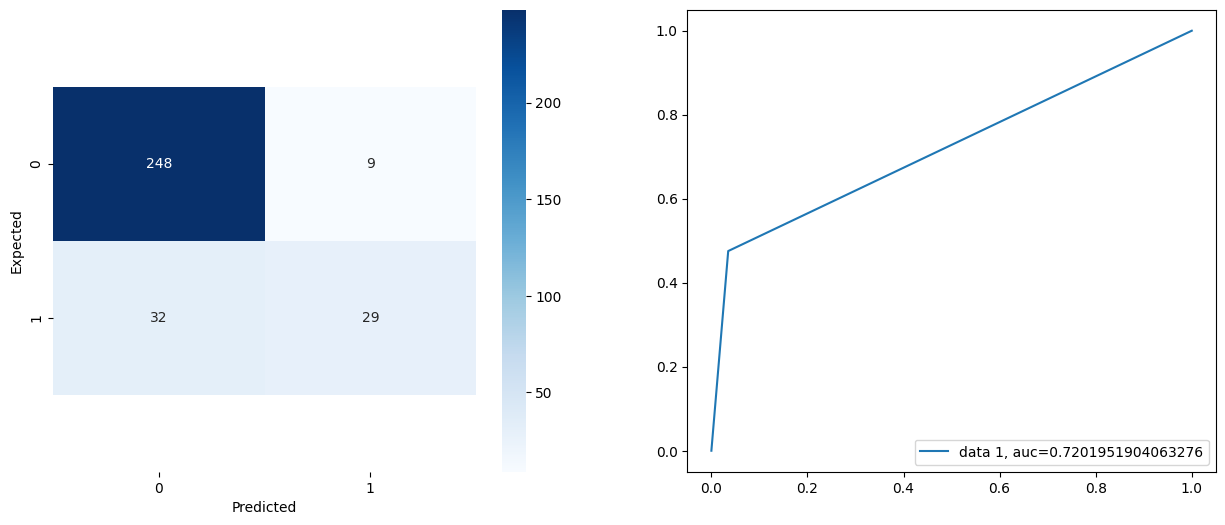

In [59]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnf_matrix),annot  =True,cmap='Blues',fmt='d')
bottom,top = ax1.get_ylim()
ax1.set_ylim(bottom+0.5 , top-0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')

ax2 = fig.add_subplot(1,2,2)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=roc_curve(y_test,prediction)
auc = roc_auc_score(y_test,prediction)
ax2 = plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()